# Classification. Linear models and KNN

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder

## Part 1: Titanic survival prediction

### Dataset

Read the description here: https://www.kaggle.com/c/titanic/data. Download the dataset and place it in the *data/titanic/* folder in your working directory.
You will use train.csv for model training and validation. The test set is used for model testing: once the model is trained, you can predict whether a passenger survived or not for each passenger in the test set, and submit the predictions: https://www.kaggle.com/c/titanic/overview/evaluation.  


In [3]:
PATH = "./data/"

In [4]:
data = pd.read_csv(os.path.join(PATH, 'titanic', 'train.csv')).set_index('PassengerId')
data.head(30)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [5]:
data.head(30)
data['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

### EDA

**(0.5 points)** How many females and males are there in the dataset? What about the survived passengers? Is there any relationship between the gender and the survival?

Количество женщин: 314
Количество мужчин: 577
Доля выживших женщин: 0.74
Доля выживших мужщин: 0.19


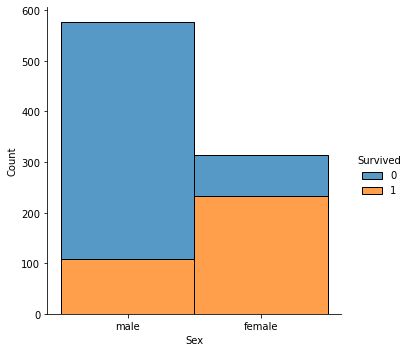

In [6]:
#females and males qantity in the dataset
n_male = data.loc[data['Sex'] == 'male'].shape[0]
n_female = data.loc[data['Sex'] == 'female'].shape[0]

n_male_surv =  data.loc[(data['Sex'] == 'male')].loc[data['Survived'] == 1].shape[0]
n_female_surv = data.loc[(data['Sex'] == 'female')].loc[data['Survived'] == 1].shape[0]
print("Количество женщин: {}".format(n_female))
print("Количество мужчин: {}".format(n_male))

print("Доля выживших женщин: {:.2}".format(n_female_surv / n_female))
print("Доля выживших мужщин: {:.2}".format(n_male_surv / n_male))
sns.displot(data, x='Sex', hue="Survived", multiple="stack")

Выжило три четверти женщин и только пятая часть мужчин. Признак 'Sex' обязательно необходимо использовать.

**(0.5 points)** Plot age distribution of the passengers. What is the average and the median age of survived and deceased passengers? Do age distributions differ for survived and deceased passengers? Why?

age distribution of survived passengers
count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64
median 28.0 

age distribution of deceased passengers
count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64
median 28.0 



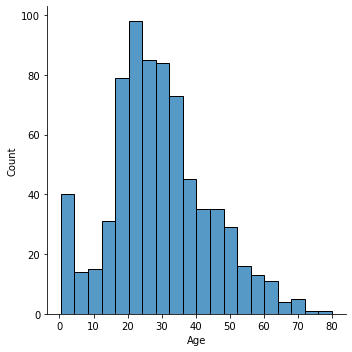

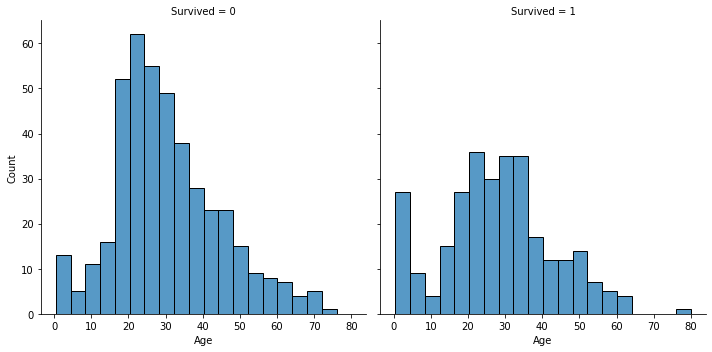

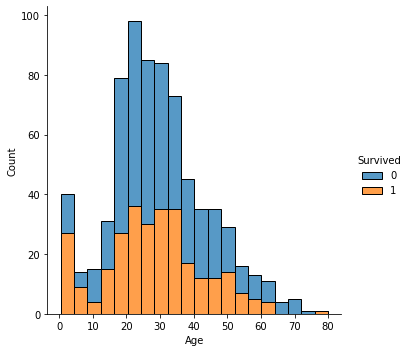

In [7]:

sns.displot(data['Age'])
sns.displot(data, x="Age", col="Survived", multiple="dodge") 
sns.displot(data, x="Age", hue="Survived", multiple="stack")
print('age distribution of survived passengers')
print(data['Age'].loc[data['Survived'] == 1].describe())
print('median', data['Age'].loc[data['Survived'] == 1].median(),'\n')

print('age distribution of deceased passengers')
print(data['Age'].loc[data['Survived'] == 0].describe())
print('median', data['Age'].loc[data['Survived'] == 0].median(),'\n')



< your thoughts >
**(1 point)** Explore "passenger class" and "embarked" features. What class was "the safest"? 
    #Is there any relationship between the embarkation port and the survival? Provide the corresponding visualizations.

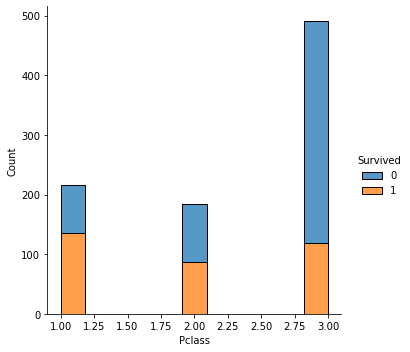

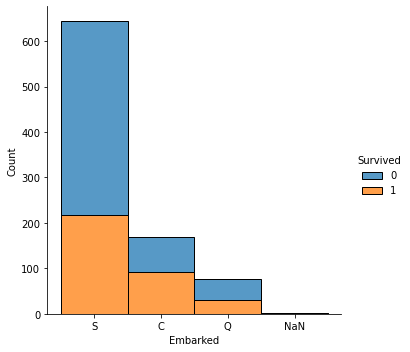

In [8]:

sns.displot(data, x="Pclass", hue="Survived", multiple="stack")
data_hist = data.copy()
data_hist['Embarked'].fillna('NaN', inplace=True)
sns.displot(data_hist, x="Embarked", hue="Survived", multiple="stack")


Наибольшая вероятность выжить была у пассажиров первого класса, наименьшая - у третьего , что предположительно, обусловлено расположенеием кают.
Наибольшая доля выживших среди пассажиров из порта С, затем Q. Наименьшая - порта S. 

### Modelling

**(0.5 points)** Find the percentage of missing values for each feature. 

In [9]:
data_NaN = (data['Cabin'] == 'Nan')
data_NaN
data.isnull().mean()

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

Think about the ways to handle these missing values for modelling and write your answer below. Which methods would you suggest? What are their advantages and disadvantages?

Для Embarked возьмем наиболее часто встречающееся значение - 's'
Для Age возьмем средний возраст
Cabin  не учитываем, поскольку очень мало значений

**(1.5 points)** Prepare the features and train two models (KNN and Logistic Regression) to predict the survival. Compare the results. Use accuracy as a metric. Don't forget about cross-validation!

In [10]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.feature_selection import VarianceThreshold, SelectFromModel, RFECV


data = pd.read_csv(os.path.join(PATH, 'titanic', 'train.csv')).set_index('PassengerId')

#новый категориальный признак - пассажир ребенок до семи лет, поскольку из этой возрастной группы больше выживших
data['Children_Age'] = data.apply(lambda x: 1 if (x['Age'] < 7) else 0, axis=1)

#новые категориальные признаки: пассажир мистер, мисс и т.д. Для женщин сильно корелируют с возрастом
data['Mrs'] = data.apply(lambda x: 1 if ('Mrs.' in x['Name']) else 0, axis=1)
data['Mr'] = data.apply(lambda x: 1 if ('Mr.' in x['Name']) else 0, axis=1)
data['Miss'] = data.apply(lambda x: 1 if ('Miss.' in x['Name']) else 0, axis=1)
data['Master'] = data.apply(lambda x: 1 if ('Master.' in x['Name']) else 0, axis=1)
data['Col'] = data.apply(lambda x: 1 if ('Col.' in x['Name']) else 0, axis=1)
data['Dr'] = data.apply(lambda x: 1 if ('Dr.' in x['Name']) else 0, axis=1)

#data = data.dropna(axis=0, subset=['Embarked'])   
# 's' is most recent value
data['Embarked'].fillna('S', inplace=True)


age_mean = data['Age'].mean()
#попытка заполнить пустые значения возраста исходя из статуса, но лучше модель работать не стала
#data['Age'] = data.apply(lambda x: 35.5 if (x['Mrs'] and (pd.isnull(x['Age']))) else 
#                         20.5 if (x['Miss'] and (pd.isnull(x['Age']))) else
#                         6.5 if (x['Master'] and (pd.isnull(x['Age'])))  else
#                         40.5 if (x['Dr'] and (pd.isnull(x['Age']))) else x['Age'], axis=1)
#data['Fare'] = np.log(data['Fare'].to_numpy() + .000001)

data['Age'].fillna(age_mean, inplace=True)

# sex 0 или 1
encoder = OrdinalEncoder()
sex = encoder.fit_transform(data['Sex'].to_numpy().reshape(-1,1))
data['sex_value'] = sex

#признаки 'Embarked', 'Pclass', 'SibSp', 'Parch' в категориальные:
#['x0_C' 'x0_Q' 'x0_S' 'x1_1' 'x1_2' 'x1_3' 'x2_0' 'x2_1' 'x2_2' 'x2_3'
# 'x2_4' 'x2_5' 'x2_8' 'x3_0' 'x3_1' 'x3_2' 'x3_3' 'x3_4' 'x3_5' 'x3_6']

encoded_features = ['Embarked', 'Pclass', 'SibSp', 'Parch']       
encoder = OneHotEncoder()
encoded = encoder.fit_transform(data[encoded_features]).toarray()
encoded_columns = encoder.get_feature_names()
data[encoded_columns] = encoded

#Все используемые признаки
features_set = ['sex_value', 'Age', 'Fare', 'Children_Age', 'Mrs', 'Mr', 'Miss', 'Master', 'Col', 'Dr'] + encoded_columns.tolist()    
features_scale_set = ['Age', 'Fare']
scaler = MinMaxScaler()
data[features_scale_set] = scaler.fit_transform(data[features_scale_set])

#вариант со стандартизацией не улучшил результат
#features_stand_set = ['Age','Fare']
#scaler = StandardScaler()
#data[features_stand_set] = scaler.fit_transform(data[features_stand_set])


#корреляционная матрица
#features_cor = ['Survived'] + features_set
#mat_c = data[features_cor].corr(method = 'pearson')
#from seaborn import heatmap
#plt.rcParams["figure.figsize"] = (20,20)
#heatmap(mat_c, center=0, square=True,cbar=True, annot=True)
#plt.title('Initial future correlation matrix')
#plt.show()


X = data[features_set].values
y = data['Survived'].values

#Логистическая регрессия
main_model = LogisticRegression(solver='liblinear', penalty='l2', C = 8)
selection_model = LogisticRegression(solver='liblinear', penalty='l1')
pipe = Pipeline([("main", main_model)])

#решетчатый поиск
param_grid = {
    'main__penalty': ['l1', 'l2'],
    'main__C' : [ 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 18, 20, 23]}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X, y)
print('Логистическая регрессия')
print("Наил значение правильности перекр проверки:{:.5f}".format(
 grid.best_score_))
print("Наилучшие параметры: {}".format(grid.best_params_))
    


Логистическая регрессия
Наил значение правильности перекр проверки:0.82156
Наилучшие параметры: {'main__C': 7, 'main__penalty': 'l2'}


In [11]:
#KNN

main_model = KNeighborsClassifier(n_neighbors = 20)
pipe = Pipeline([("main", main_model)])

#решетчатый поиск
param_grid = {'main__n_neighbors': [ 5, 10, 15, 20, 30, 50]}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X, y)
print('KNN')
print("Наил значение правильности перекр проверки:{:.5f}".format(
 grid.best_score_))
print("Наилучшие параметры: {}".format(grid.best_params_))


KNN
Наил значение правильности перекр проверки:0.82157
Наилучшие параметры: {'main__n_neighbors': 20}


**(0.5 + X points)** Try more feature engineering and hyperparameter tuning to improve the results. You may use either KNN or Logistic Regression (or both).

In [12]:
#отбор признаков с помощью линейной регресии, KNN в качестве модели для предсказания

main_model = KNeighborsClassifier(n_neighbors = 20)
selection_model = LogisticRegression(solver='liblinear', penalty='l1')
pipe = make_pipeline(SelectFromModel(selection_model), main_model) 
pipe = Pipeline([("select", SelectFromModel(selection_model)), ("main", main_model)])

#решетчатый поиск
param_grid = {'select__estimator__C': [ 5, 10, 20, 50],
    'main__n_neighbors': [ 5, 10, 15, 20, 30, 50]}

#grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X, y)
print('отбор признаков с помощью линейной регресии, KNN в качестве модели для предсказания')
print("Наил значение правильности перекр проверки:{:.5f}".format(
 grid.best_score_))
print("Наилучшие параметры: {}".format(grid.best_params_))

отбор признаков с помощью линейной регресии, KNN в качестве модели для предсказания
Наил значение правильности перекр проверки:0.82157
Наилучшие параметры: {'main__n_neighbors': 20}


Лучший результат на тестовом наборе дает логистичнская регрессия (чем KNN, лог регрессия для отбора + KNN)

Load the test set and make the predictions. Submit them to kaggle and see the results :)
Select the best model, load the test set and make the predictions. Submit them to kaggle.

**Note**. X points will depend on your kaggle leaderboard score.
$$ f(score) = 0.5, \ \ 0.76 \leq score < 0.78,$$
$$ f(score) = 1.0, \ \ 0.78 \leq score < 0.81,$$ 
$$ f(score) = 2.5, \ \ 0.81 \leq score $$ 
Your code should generate the output submitted to kaggle. Fix random seeds to make the results reproducible.

Лучший результат на тестовом наборе дает логистичнская регрессия (чем KNN, лог регрессия для отбора + KNN)

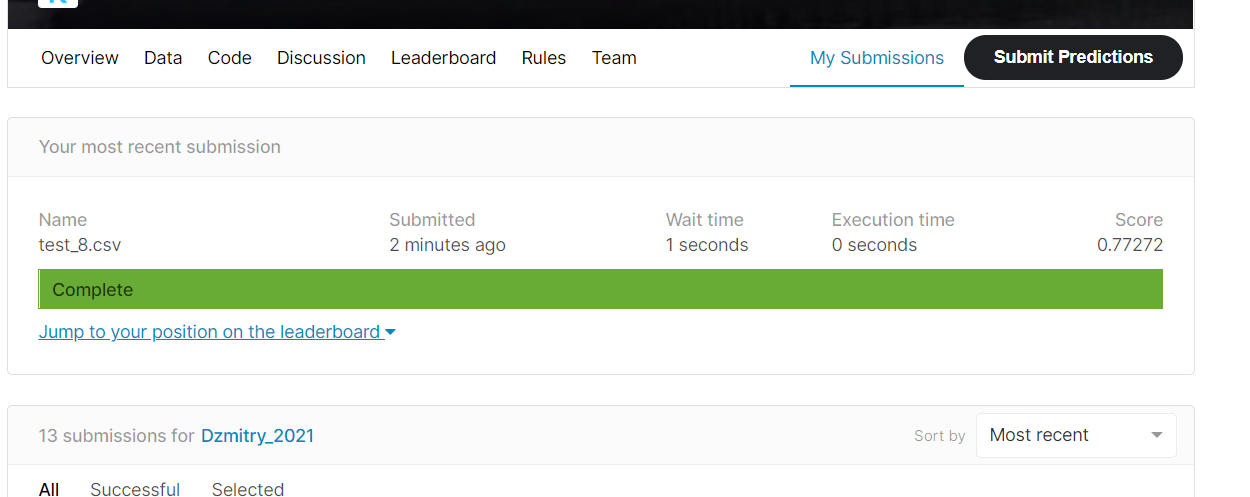

In [13]:
#Лучший результат при использовании логистическая регрессии
main_model = LogisticRegression(solver='liblinear', penalty='l2', C = 8)
selection_model = LogisticRegression(solver='liblinear', penalty='l1')
pipe = Pipeline([("main", main_model)])

#решетчатый поиск
param_grid = {
    'main__penalty': ['l1', 'l2'],
    'main__C' : [ 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 18, 20, 23]}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X, y)
print('Логистическая регрессия')
print("Наил значение правильности перекр проверки:{:.5f}".format(
 grid.best_score_))
print("Наилучшие параметры: {}".format(grid.best_params_))
    
#тестовые данные
datat = pd.read_csv(os.path.join(PATH, 'titanic', 'test.csv')).set_index('PassengerId')

datat['Children_Age'] = datat.apply(lambda x: 1 if (x['Age'] < 7) else 0, axis=1)

datat['Mrs'] = datat.apply(lambda x: 1 if ('Mrs.' in x['Name']) else 0, axis=1)
datat['Mr'] = datat.apply(lambda x: 1 if ('Mr.' in x['Name']) else 0, axis=1)
datat['Miss'] = datat.apply(lambda x: 1 if ('Miss.' in x['Name']) else 0, axis=1)
datat['Master'] = datat.apply(lambda x: 1 if ('Master.' in x['Name']) else 0, axis=1)
datat['Col'] = datat.apply(lambda x: 1 if ('Col.' in x['Name']) else 0, axis=1)
datat['Dr'] = datat.apply(lambda x: 1 if ('Dr.' in x['Name']) else 0, axis=1)

age_mean = datat['Age'].mean()

#datat['Age'] = datat.apply(lambda x: 35.5 if (x['Mrs'] and (pd.isnull(x['Age']))) else 
#                         20.5 if (x['Miss'] and (pd.isnull(x['Age']))) else
#                         6.5 if (x['Master'] and (pd.isnull(x['Age'])))  else
#                         40.5 if (x['Dr'] and (pd.isnull(x['Age']))) else x['Age'], axis=1)
#datat['Fare'] = np.log(datat['Fare'].to_numpy() + .000001)
datat['Age'].fillna(age_mean, inplace=True)

encoder = OrdinalEncoder()
sex = encoder.fit_transform(datat['Sex'].to_numpy().reshape(-1,1))
datat['sex_value'] = sex

encoded_features = ['Embarked', 'Pclass', 'SibSp', 'Parch']       
encoder = OneHotEncoder()
encoded = encoder.fit_transform(datat[encoded_features]).toarray()
#новое значение "9" вместо "6" колонке 'Parch', поэтому 
#признаки 'Embarked', 'Pclass', 'SibSp', 'Parch' в категориальные:
#['x0_C' 'x0_Q' 'x0_S' 'x1_1' 'x1_2' 'x1_3' 'x2_0' 'x2_1' 'x2_2' 'x2_3'
# 'x2_4' 'x2_5' 'x2_8' 'x3_0' 'x3_1' 'x3_2' 'x3_3' 'x3_4' 'x3_5' 'x3_9']
#вместо 'x3_9' используем 'x3_6' - encoded_columns
encoded_columns2 = encoder.get_feature_names()
datat[encoded_columns2] = encoded
datat['x3_6'] = datat['x3_9']

features_set = ['sex_value', 'Age', 'Fare', 'Children_Age', 'Mrs', 'Mr', 'Miss', 'Master', 'Col', 'Dr'] + encoded_columns.tolist()    
features_scale_set = ['Age', 'Fare']
scaler = MinMaxScaler()
datat[features_scale_set] = scaler.fit_transform(datat[features_scale_set])

#появились новые столбцы с отсутствующими значениями
#Fill NA in features columns
for feat in features_set:
    datat.fillna({feat: datat[feat].mean()}, inplace=True)
    
X_train, y_train,  = data[features_set].values, data['Survived'].values
X_test = datat[features_set].values                                         

#применим результаты решетчатого поиска для предсказания тестовых данных
y_test_predict = grid.predict(X_test)


datat['Survived']  = y_test_predict
datat['Survived'].to_csv('test_8.csv', index=True)    
print('результаты предскказания:',y_test_predict)



Логистическая регрессия
Наил значение правильности перекр проверки:0.82156
Наилучшие параметры: {'main__C': 7, 'main__penalty': 'l2'}
результаты предскказания: [0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 

## Part 2: Porto Seguro’s Safe Driver Prediction

Let's build a model that predicts the probability that a driver will initiate an auto insurance claim in the next year.
Read the detailed description and download the dataset https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/data. Put the data into *./data/porto/*.

In [14]:
insurance_data = pd.read_csv(os.path.join(PATH, 'porto', 'train.csv')).set_index('id')

In [15]:
insurance_data.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


Let's skip EDA for now. We'll use SGDClassifier and build a simple baseline: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html.
Note that loss='log' gives logistic regression.

In [16]:
y = insurance_data['target']
X = insurance_data.drop(columns=['target'])

In [17]:
numeric_features = [column for column in X if not (column.endswith("cat") or column.endswith("bin"))]
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = [column for column in X if (column.endswith("cat") or column.endswith("bin"))]
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SGDClassifier(loss='log', alpha=0.001, n_jobs=-1, random_state=14))])

In [18]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
clf = pipeline.fit(X_train, y_train)

We'll calculate the model accuracy:

In [20]:
accuracy_score(y_true=y_valid, y_pred=clf.predict(X_valid))

0.9631224658945812

Wow! Our model gets ~0.963 accuracy! But is it really good?...

Let's plot the confusion matrix and analyze the errors.

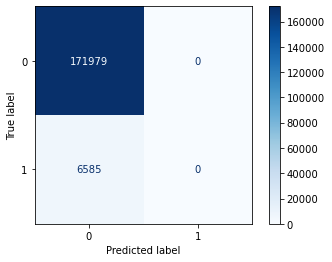

In [21]:
disp = plot_confusion_matrix(clf, X_valid, y_valid,
                             cmap=plt.cm.Blues,
                             normalize=None)

Well, it turns out that our model is completely useless. Let's calculate some basic statistics:

In [22]:
insurance_data.describe()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As you see, there are less than 4% of positive examples, so we have to deal with a highly imbalanced dataset.

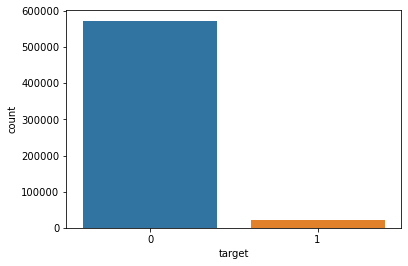

In [23]:
sns.countplot(x='target', data=insurance_data)
plt.show()

Accuracy is not informative here and the Normalized Gini Coefficient will be used instead: https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/overview/evaluation.

In [24]:
# Code for calculating Normalized gini coefficient
# https://www.kaggle.com/c/ClaimPredictionChallenge/discussion/703
def gini(actual, pred, cmpcol = 0, sortcol = 1):  
    assert(len(actual) == len(pred))  
    epsilon = 1e-7
    values = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)  
    values = values[np.lexsort((values[:, 2], -1 * values[:, 1]))]  
    total = values[:, 0].sum() 
    gini_sum = (values[:, 0].cumsum().sum() + epsilon) / (total + epsilon)  
  
    gini_sum -= (len(actual) + 1) / 2  
    return gini_sum / len(actual)  
  
def gini_normalized(a, p):  
    '''Function to calculate the normalized gini coefficient'''
    return gini(a, p) / gini(a, a)

**(1.5 points)** Prove that the **Normalized Gini Coefficient** is equivalent to **2 x AUC - 1** :

< your proof >

**(0.5 points)** By the way, what other metrics could you suggest for this problem?

Можно использовать метрики precision (точность) и recall (полнота).

$\large precision = \frac{TP}{TP + FP}$

$\large recall = \frac{TP}{TP + FN}$

Precision можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными, а recall показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.

Именно введение precision не позволяет нам записывать все объекты в один класс, так как в этом случае мы получаем рост уровня False Positive. Recall демонстрирует способность алгоритма обнаруживать данный класс вообще, а precision — способность отличать этот класс от других классов.

Precision и recall не зависят, в отличие от accuracy, от соотношения классов и потому применимы в условиях несбалансированных выборок.

Обычно при оптимизации гиперпараметров алгоритма (например, в случае перебора по сетке GridSearchCV ) используется одна метрика, улучшение которой мы и ожидаем увидеть на тестовой выборке.
Существует несколько различных способов объединить precision и recall в агрегированный критерий качества. F-мера (в общем случае ) — среднее гармоническое precision и recall 

$\large \ F_\beta = (1 + \beta^2) \cdot \frac{precision \cdot recall}{(\beta^2 \cdot precision) + recall}$

 в данном случае определяет вес точности в метрике, и при  это среднее гармоническое (с множителем 2, чтобы в случае precision = 1 и recall = 1 иметь )
F-мера достигает максимума при полноте и точности, равными единице, и близка к нулю, если один из аргументов близок к нулю.

Let's calculate the Normalized Gini Coefficient:

In [25]:
y_pred = clf.predict_proba(X_valid)[:, 1]

In [26]:
gini_normalized(y_valid, y_pred)

0.2558723581569817

**(0.5 points + Y bonus points)** Try different approaches: oversampling / undersampling, careful feature analysis and feature engineering, etc., to get a reasonable pipeline and improve the model quality. Use cross-validation for model evaluation.

Select the best model, load the test set and make the predictions. Submit them to kaggle.
Y bonus points will be calculated as $\frac{round(200 * \max(score - 0.253, 0))}{2}$, where *score* is your kaggle leaderboard score.

Note: do not use any classification models which have not been covered in the lessons yet.

In [27]:
y = insurance_data['target']
X = insurance_data.drop(columns=['target'])
numeric_features = [column for column in X if not (column.endswith("cat") or column.endswith("bin"))]
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = [column for column in X if (column.endswith("cat") or column.endswith("bin"))]
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])



In [28]:
empty_data = (X == -1).mean()

In [29]:
#убираем признаки с большим количеством неизвестных значений (-1 для данного датасета):
#ps_reg_03         0.181065, ps_car_03_cat     0.690898, ps_car_05_cat     0.447825
numeric_features = [column for column in X if ( not (column.endswith("cat") or column.endswith("bin"))
                                                and (empty_data[column] < 0.1))]
categorical_features = [column for column in X if ((column.endswith("cat") or column.endswith("bin")) 
                                                and (empty_data[column] < 0.1))]
#print(categorical_features, '\n')
#print(numeric_features)

#заменяем -1 на средние значения в остальных столбцах (где имеются)
categorical_features_with_empty = [column for column in X if ((column.endswith("cat") or column.endswith("bin")) 
                                                and (0 < empty_data[column] < 0.1))]
print(categorical_features_with_empty, '\n')
for col in categorical_features_with_empty:
    col_mean = round(X[col].mean())
    X[col] = X.apply(lambda y:  col_mean if (y[col] == -1) else y[col], axis=1)

numeric_features_with_empty = [column for column in X if ( not (column.endswith("cat") or column.endswith("bin"))
                                                and (0 < empty_data[column] < 0.1))]
print(numeric_features_with_empty, '\n')
for col in numeric_features_with_empty:
    col_mean = X[col].mean()
    X[col] = X.apply(lambda y:  col_mean if (y[col] == -1) else y[col], axis=1)

['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_07_cat', 'ps_car_09_cat'] 

['ps_car_11', 'ps_car_12', 'ps_car_14'] 



In [35]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SGDClassifier(loss='log', alpha=0.001, n_jobs=-1, random_state=14))])

#X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)
#clf = pipeline.fit(X_train, y_train)

In [36]:
#y_pred = clf.predict_proba(X_valid)[:, 1]
#gini_normalized(y_valid, y_pred)

from sklearn.metrics import classification_report
#решетчатый поиск
param_grid = {
    #'main__penalty': ['l1', 'l2'],
    'classifier__alpha' : [ 0.000001]}#, 0.00001, 0.0001]}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='f1')
grid.fit(X, y)
grid.fit(X_train, y_train)
print ('Best score: %0.5f' % grid.best_score_)
print ('Best parameters set:')
best_parameters = grid.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))

predictions = grid.predict(X)
print(classification_report(y, predictions))
    
    

Best score: 0.01445
Best parameters set:
	classifier__alpha: 1e-06


C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98    573518
           1       0.00      0.00      0.00     21694

    accuracy                           0.96    595212
   macro avg       0.48      0.50      0.49    595212
weighted avg       0.93      0.96      0.95    595212



Модель предсказывает все значения равными нулю, т.е. абсолютно бесполезна для решения нашей задачи.
Такие же предсказаня и на тестовых данных.


In [ ]:
#тестовые данные
X_test = pd.read_csv(os.path.join(PATH, 'porto', 'test.csv')).set_index('id')

for col in categorical_features_with_empty:
    col_mean = round(X_test[col].mean())
    X_test[col] = X_test.apply(lambda y:  col_mean if (y[col] == -1) else y[col], axis=1)


for col in numeric_features_with_empty:
    col_mean = X_test[col].mean()
    X_test[col] = X_test.apply(lambda y:  col_mean if (y[col] == -1) else y[col], axis=1)
    


In [ ]:
#применим результаты решетчатого поиска для предсказания тестовых данных
y_test_predict = grid.predict(X_test)


X_test['target']  = y_test_predict
X_test['target'].to_csv('porto_test_1.csv', index=True)    
